<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Training</a></span></li></ul></div>

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('data_set/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
correlation=housing.corr()["SalePrice"].sort_values(ascending=False)
ordened=list(correlation.index)
num = ordened[1:]

In [6]:
correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
housing_labels = housing["SalePrice"].copy() 
housing = housing.drop("SalePrice",axis=1)

In [8]:
housing[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageCars     1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   TotalBsmtSF    1460 non-null   int64  
 5   1stFlrSF       1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   TotRmsAbvGrd   1460 non-null   int64  
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  GarageYrBlt    1379 non-null   float64
 11  MasVnrArea     1452 non-null   float64
 12  Fireplaces     1460 non-null   int64  
 13  BsmtFinSF1     1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  WoodDeckSF     1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  HalfBath

In [9]:
cat = ["LotShape","Utilities","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtFinType1",
       "BsmtFinType2","HeatingQC","CentralAir","KitchenQual","Functional",
       "GarageFinish","GarageQual","GarageCond"]


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder()),
    ('scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder()),
    ('scaler',StandardScaler())
])


In [11]:
from sklearn.compose import ColumnTransformer



full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num),
    ("cat", cat_pipeline, cat)
])

In [12]:
housing_prepared= full_pipeline.fit_transform(housing)

# models

## LinearRegressor

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(housing, housing_labels,train_size= 0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, random_state=42)


lr = LinearRegression().fit(X_train, y_train)


print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


## RidgeRegressor Complexity

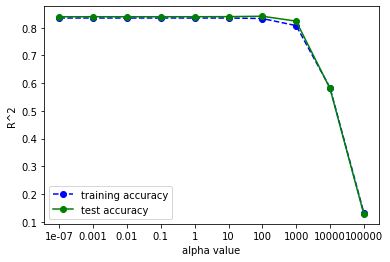

In [14]:
from sklearn.linear_model import Ridge
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
alpha_settings = [0.0000001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000,100000]
for alpha in alpha_settings:
 # build the model
 clf = Ridge(alpha = alpha)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
ax = plt.axes()
plt.plot(range(len(alpha_settings)), training_accuracy,'bo--', label="training accuracy")
plt.plot(range(len(alpha_settings)), test_accuracy, 'go-',label="test accuracy")
plt.xticks(range(len(alpha_settings)), alpha_settings)
plt.ylabel("R^2")
plt.xlabel("alpha value")
plt.legend()

## LassoRegressor Complexity

D:\archivos_de_programa\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+10, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(
D:\archivos_de_programa\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+10, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(
D:\archivos_de_programa\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.92

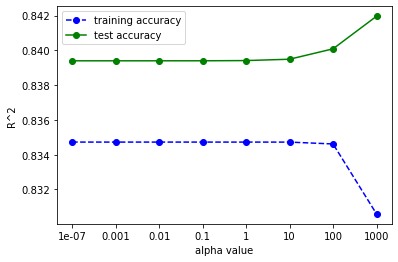

In [15]:
from sklearn.linear_model import Lasso
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
alpha_settings = [0.0000001,0.001, 0.01, 0.1, 1, 10, 100,1000]
for alpha in alpha_settings:
 # build the model
 clf = Lasso(alpha = alpha, max_iter = 1000)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
ax = plt.axes()
plt.plot(range(len(alpha_settings)), training_accuracy,'bo--', label="training accuracy")
plt.plot(range(len(alpha_settings)), test_accuracy, 'go-',label="test accuracy")
plt.xticks(range(len(alpha_settings)), alpha_settings)
plt.ylabel("R^2")
plt.xlabel("alpha value")
plt.legend()

## KneighborsRegressor Complexity

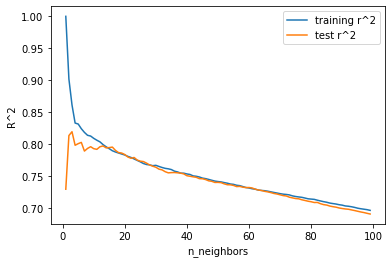

In [16]:
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 100)
for n_neighbors in neighbors_settings:
 # build the model
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(reg.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(reg.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training r^2",)
plt.plot(neighbors_settings, test_accuracy, label="test r^2")
plt.ylabel("R^2")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## TreeRegressor Complexity

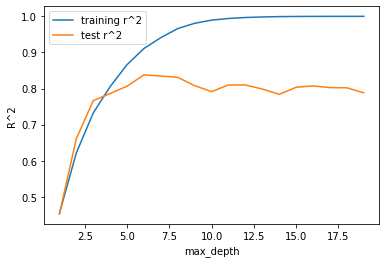

In [17]:
from sklearn.tree import DecisionTreeRegressor


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)
for max_depht in neighbors_settings:
 # build the model
 reg = DecisionTreeRegressor(max_depth=max_depht)
 reg.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(reg.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(reg.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training r^2")
plt.plot(neighbors_settings, test_accuracy, label="test r^2")
plt.ylabel("R^2")
plt.xlabel("max_depth")
plt.legend()

### Random Tree Regressor

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,max_depth = 10, max_features= 5)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.014
